In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set visual style
sns.set(style="whitegrid")


In [4]:
# Set base and subdirectory paths
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

print("Train Folder:", train_dir)
print("Validation Folder:", val_dir)
print("Test Folder:", test_dir)


Train Folder: c:\Lung_Cancer_TransferLearning\data\train
Validation Folder: c:\Lung_Cancer_TransferLearning\data\val
Test Folder: c:\Lung_Cancer_TransferLearning\data\test


In [5]:
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Display class distributions
print("📁 Train Set:", count_images(train_dir))
print("📁 Validation Set:", count_images(val_dir))
print("📁 Test Set:", count_images(test_dir))


📁 Train Set: {'NORMAL': 1341, 'PNEUMONIA': 3875}
📁 Validation Set: {'NORMAL': 8, 'PNEUMONIA': 8}
📁 Test Set: {'NORMAL': 234, 'PNEUMONIA': 390}


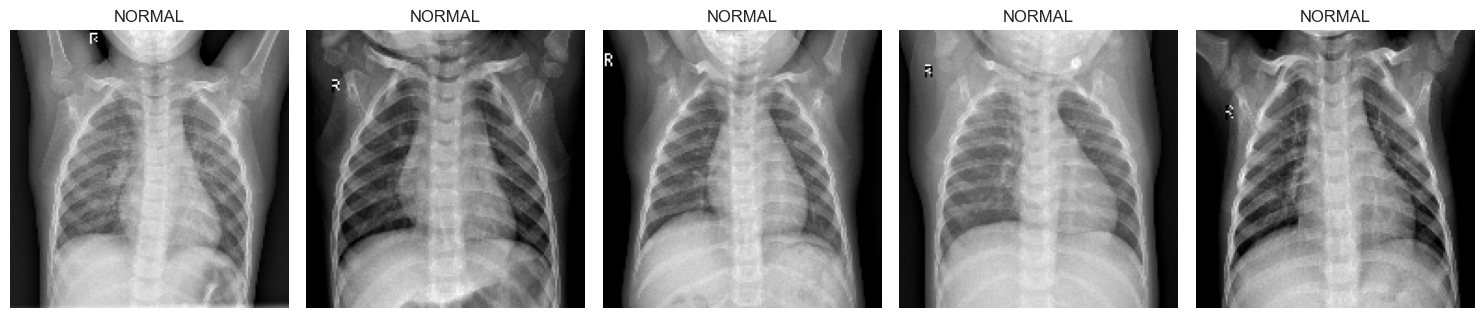

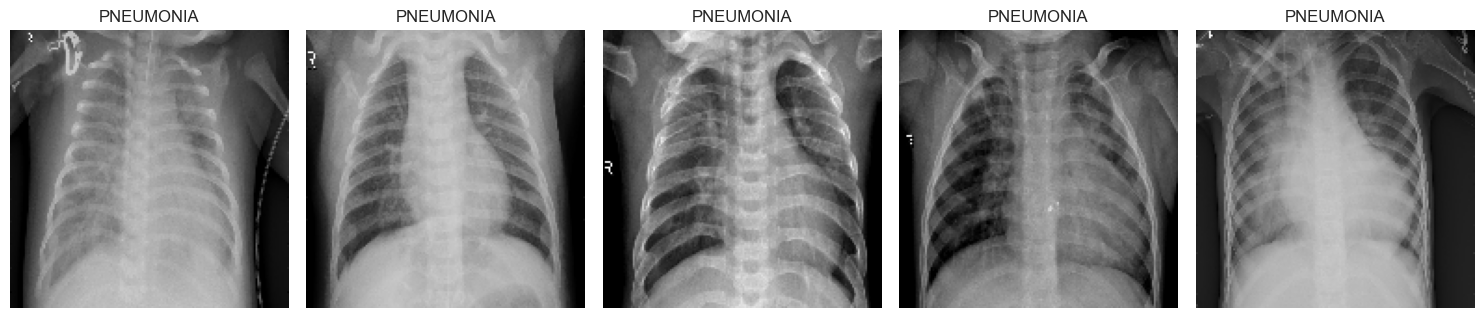

In [6]:
def plot_sample_images(class_name, dataset_dir=train_dir, n=5):
    path = os.path.join(dataset_dir, class_name)
    images = os.listdir(path)[:n]

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show 5 sample images
plot_sample_images('NORMAL')
plot_sample_images('PNEUMONIA')


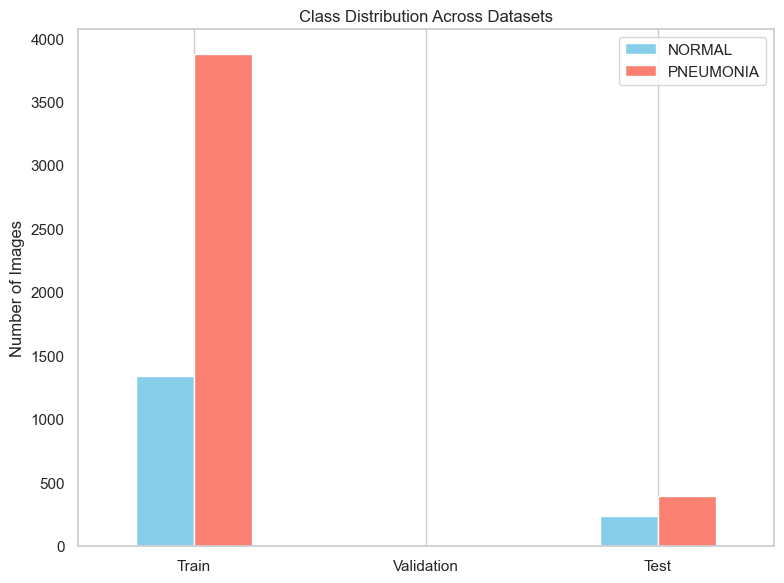

In [7]:
train_counts = count_images(train_dir)
val_counts   = count_images(val_dir)
test_counts  = count_images(test_dir)

df_stats = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).T

df_stats.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Class Distribution Across Datasets')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
